# 1.Import Library

In [1]:
# 导入库
import numpy as np  # numpy库
from sklearn.linear_model import BayesianRidge, LinearRegression, ElasticNet  # 批量导入要实现的回归算法
from sklearn.svm import SVR  # SVM中的回归算法
from sklearn.svm import LinearSVR  # SVM中的回归算法
#from sklearn.ensemble.gradient_boosting import GradientBoostingRegressor  # 集成算法
from sklearn.model_selection import cross_val_score  # 交叉检验
from sklearn.metrics import explained_variance_score, mean_absolute_error, mean_squared_error, r2_score  # 批量导入指标算法
import pandas as pd  # 导入pandas
import matplotlib.pyplot as plt  # 导入图形展示库
import xlwt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import joblib  # 添加模型保存库

# 2.Data processing

In [2]:
#读取表头
workbook = xlwt.Workbook(encoding='utf-8')
#创建表
worksheet = workbook.add_sheet('sheet1')
#往单元格内写入内容:写入表头


In [3]:
raw_data = pd.read_csv(open(r'\SVM-Dis train.csv',encoding='UTF-8'))
X_train = raw_data.iloc[:, 0:30].values
y_train = raw_data.iloc[:, 30].values    #导入数据  iloc通过行号获取行数据
#print("X",X)
#print("y",y)
#print("X",len(X))  
#print(X.shape)
#print(X[0])
#print(y.shape)
#print(y[0])

In [4]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

In [ ]:
#网格搜索最佳参数
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(SVR(), param_grid={"C":[0.01,0.1, 1, 10,100], "gamma": [0.001,0.01,0.1, 1, 10,100,1000],'epsilon':[0.01,0.1, 1, 10,100]})
grid.fit(X_train, y_train)
print("The best parameters are %s with a score of %0.2f"
     % (grid.best_params_, grid.best_score_))


#from sklearn.model_selection import GridSearchCV
#grid = GridSearchCV(SVC(), param_grid={"C":[0.001,0.01,1,10,100], "gamma": [0.001,0.01,1,10,100]})
#grid.fit(arr, train_y.ravel())
#print("The best parameters are %s with a score of %0.2f"
#      % (grid.best_params_, grid.best_score_))

# 3. SVM-Dis model, training and testing

In [5]:
from sklearn import metrics
from sklearn.metrics import r2_score
# 训练回归模型
n_folds = 6  # 设置交叉检验的次数
#model_svr = SVR(kernel='rbf',C=grid.best_params_['C'],epsilon=grid.best_params_['epsilon'],gamma=grid.best_params_['gamma'])  # 建立支持向量机回归模型对象 ,C= 0.01,epsilon= 0.016756819922500475
model_svr = SVR(kernel='rbf',C=100,epsilon=10,gamma=0.1)  # 建立支持向量机回归模型对象 ,C= 0.01,epsilon= 0.016756819922500475


model_names = ['SVR']  # 不同模型的名称列表

scores = cross_val_score(model_svr, X_train, y_train, cv=n_folds)  # 将每个回归模型导入交叉检验模型中做训练检验
cv_score_list = []  # 交叉检验结果列表
cv_score_list.append(scores)  # 将交叉检验结果存入结果列表
model_svr.fit(X_train, y_train)
train_prediction=model_svr.predict(X_train)
    

print(model_svr)
# 支持向量的系数（dual_coef_）
print("Dual coefficients (alpha_i * y_i):", model_svr.dual_coef_)
# 支持向量
print("Support vectors:", model_svr.support_vectors_)

joblib.dump(model_svr, 'SVM_Dis.pkl')  # 保存完整模型


# 模型效果指标评估
n_samples, n_features = X_train.shape  
#print(n_samples, n_features)
model_metrics_name = [explained_variance_score, mean_absolute_error, mean_squared_error, r2_score]  # 回归评估指标对象集
model_metrics_list = []  # 回归评估指标列表
for i in range(1):  # 循环每个模型索引
    tmp_list = []  # 每个内循环的临时结果列表
    for m in model_metrics_name:  # 循环每个指标对象
        tmp_score = m(y_train, train_prediction)  # 计算每个回归指标结果
        tmp_list.append(tmp_score)  # 将结果存入每个内循环的临时结果列表
    model_metrics_list.append(tmp_list)  # 将结果存入回归评估指标列表
df1 = pd.DataFrame(cv_score_list, index=model_names)  # 建立交叉检验的数据框
df2 = pd.DataFrame(model_metrics_list, index=model_names, columns=['ev', 'mae', 'mse', 'r2'])  # 建立回归指标的数据框
#print ('samples: %d \t features: %d' % (n_samples, n_features))  # 打印输出样本量和特征数量
print (70 * '-')  # 打印分隔线
print ('cross validation result:')  # 打印输出标题
print (df1)  # 打印输出交叉检验的数据框
print (70 * '-')  # 打印分隔线
print ('regression metrics:')  # 打印输出标题
print (df2)  # 打印输出回归指标的数据框
print (70 * '-')  # 打印分隔线
print ('short name \t full name')  # 打印输出缩写和全名标题
print ('ev \t explained_variance')
print ('mae \t mean_absolute_error')
print ('mse \t mean_squared_error')
print ('r2 \t r2')
print (70 * '-')  # 打印分隔线



train_prediction[train_prediction <= 0] = 10
y_train=np.log10(y_train) 
train_prediction=np.log10(train_prediction)
      

print("训练标准差STD=",np.std(train_prediction-y_train))
print("训练误差均值MEAN=",np.mean(train_prediction-y_train))
print("训练平均绝对误差MAE=",metrics.mean_absolute_error(train_prediction, y_train))
print("训练RMSE=",metrics.mean_squared_error(train_prediction, y_train)**0.5)
print("训练MAPE=",np.mean(np.abs((y_train - train_prediction) / y_train)) * 100)
print("训练r2 score:", r2_score(y_train.ravel(), train_prediction))
#测试
#test_prediction=model_svr.predict(X_test)


#print(len(y_test-test_prediction))
#print("测试标准差=",np.std(y_test-test_prediction))
#print("测试误差均值=",np.mean(y_test-test_prediction))
#print("测试平均绝对误差=",np.mean(abs(y_test-test_prediction)))

#print("测试平均绝对误差MAE=",metrics.mean_absolute_error(test_prediction, y_test))
#print("测试RMSE=",metrics.mean_squared_error(test_prediction, y_test)**0.5)
#print("测试r2 score:", r2_score(y_test, test_prediction))



SVR(C=100, epsilon=10, gamma=0.1)
Dual coefficients (alpha_i * y_i): [[ -81.86796791 -100.          100.         ...  100.
  -100.         -100.        ]]
Support vectors: [[-7.58078817 -3.49608854 -1.45987455 ... -3.89173205 -5.88098995
  -6.3259347 ]
 [-7.67226378 -3.45076332 -1.55502053 ... -4.17140034 -6.06890523
  -6.6200752 ]
 [-7.43744774 -3.37460961 -1.3471372  ... -4.24982106 -5.96232877
  -6.65120938]
 ...
 [-8.90340213 -4.34692755 -2.75760487 ... -4.74029196 -7.41121748
  -7.45299701]
 [-8.75921383 -4.55518996 -2.69549284 ... -4.67274222 -7.24008866
  -7.40043162]
 [-7.55261153 -3.69220883 -1.61924696 ... -3.75951707 -6.0620443
  -6.41028278]]
----------------------------------------------------------------------
cross validation result:
            0         1         2         3         4        5
SVR  0.699103  0.633018  0.629064  0.489704  0.575791  0.69895
----------------------------------------------------------------------
regression metrics:
           ev        mae

In [6]:
import pickle
import os
# 序列化模型并计算大小
with open('model.pkl', 'wb') as f:
    pickle.dump(model_svr, f)
size_mb = os.path.getsize('model.pkl') / 1024**2
print("Model size (MB):", size_mb)
os.remove('model.pkl')  # 清理临时文件

Model size (MB): 6.046662330627441


In [7]:
# 2. 获取参数量
n_support_vectors = model_svr.support_vectors_.shape[0]
n_features = model_svr.support_vectors_.shape[1]
total_params = n_support_vectors * (n_features + 1) + 1  # 支持向量 + dual_coef + 偏置项
 
print("Number of support vectors:", n_support_vectors)
print("Number of features:", n_features)
print("Total parameters:", total_params)

Number of support vectors: 25156
Number of features: 30
Total parameters: 779837


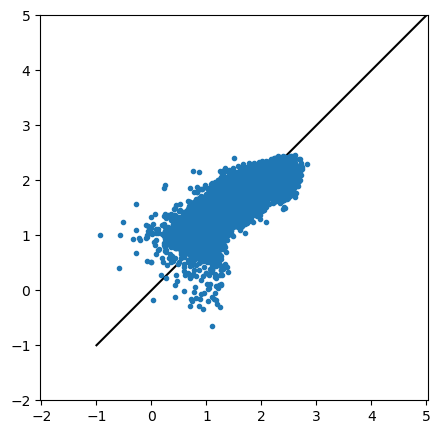

In [8]:
#训练结果
plt.figure(figsize=(5, 5))
plt.axis('equal')
#y_train-pre_y_list[3]
x3 = np.arange(-1, 200, 1)
y3=x3
plt.plot(x3, y3, "black")

plt.plot(y_train,train_prediction,'.')
plt.xlim(-2, 5)
plt.ylim(-2, 5)
plt.show()

In [9]:
#########################保存训练结果####################################
y_train=y_train.reshape(y_train.shape[0],1)
train_prediction=train_prediction.reshape(train_prediction.shape[0],1)
#print(y_train.shape)
#print(train_prediction.shape)


tr_result=np.concatenate((y_train,train_prediction),axis=1)
#print(tr_result.shape)

data_tr = pd.DataFrame(tr_result) #将数组转换为dataframe结构
data_tr.columns=['True LGED','Pred LGED']
writer_tr = pd.ExcelWriter(r'\SVM-Dis\distrain.xls')   # 写入Excel文件

data_tr.to_excel(writer_tr,float_format='%.5f',index=False)   ## ‘page_1’是写入excel的sheet名
writer_tr.save()
writer_tr.close()
#########################保存训练结果####################################

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_9536\2277667543.py:13: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  writer_tr = pd.ExcelWriter(r'E:\审稿中-震中距和震级估计\输入\震中距\SVM-Dis\train3-SVRdiszzz.xls')   # 写入Excel文件
C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_9536\2277667543.py:16: FutureWarning: save is not part of the public API, usage can give unexpected results and will be removed in a future version
  writer_tr.save()


In [9]:
#推理时间
zhenli = pd.read_csv(open(r'\SVM-Dis test.csv',encoding='UTF-8'))
X_zhenli1 = zhenli.iloc[:, 0:30].values
y_zhenli1 = zhenli.iloc[:, 30].values    #导入数据  iloc通过行号获取行数据
X_zhenli1=X_zhenli1[1,:].reshape(1, -1)
y_zhenli1=y_zhenli1[1]

import time
start_time = time.perf_counter()  # 记录开始时间
zhenli_prediction=model_svr.predict(X_zhenli1)
end_time = time.perf_counter()  # 记录结束时间
elapsed_time_ms = (end_time - start_time) * 1000  # 转换为毫秒
print(f"Elapsed time: {elapsed_time_ms:.2f} ms")


Elapsed time: 3.14 ms


In [10]:
print(type(y_zhenli1))
print(X_zhenli1.shape)

<class 'numpy.float64'>
(1, 30)


In [10]:
#震例
zhenli = pd.read_csv(open(r'\SVM-Dis test.csv',encoding='UTF-8'))
X_zhenli1 = zhenli.iloc[:, 0:30].values
y_zhenli1 = zhenli.iloc[:, 30].values    #导入数据  iloc通过行号获取行数据
zhenli_prediction=model_svr.predict(X_zhenli1)

zhenli_prediction[zhenli_prediction <= 0] = 10
y_zhenli1=np.log10(y_zhenli1) 
zhenli_prediction=np.log10(zhenli_prediction)

from sklearn import metrics
from sklearn.metrics import r2_score
#print(len(y_zhenli1-zhenli_prediction))
print("震例标准差=",np.std(y_zhenli1-zhenli_prediction))
print("震例误差均值=",np.mean(y_zhenli1-zhenli_prediction))
print("震例平均绝对误差=",np.mean(abs(y_zhenli1-zhenli_prediction)))

print("震例平均绝对误差MAE=",metrics.mean_absolute_error(zhenli_prediction, y_zhenli1))
print("震例RMSE=",metrics.mean_squared_error(zhenli_prediction, y_zhenli1)**0.5)
print("震例r2 score:", r2_score(y_zhenli1, zhenli_prediction))


震例标准差= 0.2017491631506693
震例误差均值= -0.014509783484641364
震例平均绝对误差= 0.14694328961513803
震例平均绝对误差MAE= 0.14694328961513803
震例RMSE= 0.20227026140480103
震例r2 score: 0.6946021725855687


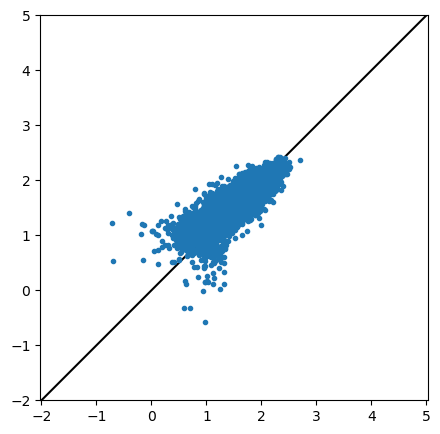

In [11]:
#震例结果
plt.figure(figsize=(5, 5))
plt.axis('equal')

x3 = np.arange(-2, 5, 0.01)
y3=x3
plt.plot(x3, y3, "black")

plt.plot(y_zhenli1,zhenli_prediction,'.')
plt.xlim(-2, 5)
plt.ylim(-2, 5)
plt.show()

In [14]:
#########################保存震例结果####################################
y_zhenli1=y_zhenli1.reshape(y_zhenli1.shape[0],1)
zhenli_prediction=zhenli_prediction.reshape(zhenli_prediction.shape[0],1)
#print(y_zhenli.shape)
#print(zhenli_prediction.shape)


tr_result=np.concatenate((y_zhenli1,zhenli_prediction),axis=1)
#print(tr_result.shape)

data_tr = pd.DataFrame(tr_result) #将数组转换为dataframe结构
data_tr.columns=['True LGED','Pred LGED']
writer_tr = pd.ExcelWriter(r'\SVM-Dis\distest.xls')   # 写入Excel文件

data_tr.to_excel(writer_tr,float_format='%.5f',index=False)   ## ‘page_1’是写入excel的sheet名
writer_tr.save()
writer_tr.close()
#########################保存震例结果####################################

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_9536\1093877416.py:13: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  writer_tr = pd.ExcelWriter(r'E:\审稿中-震中距和震级估计\输入\震中距\SVM-Dis\zhenli3-SVRdiszzz.xls')   # 写入Excel文件
C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_9536\1093877416.py:16: FutureWarning: save is not part of the public API, usage can give unexpected results and will be removed in a future version
  writer_tr.save()


# Test on the Chinese strong-ground motion data

In [15]:
#中国地区应用
zhenli_CH = pd.read_csv(open(r'\SVM-Dis test in China.csv',encoding='UTF-8'))
X_zhenli1_CH = zhenli_CH.iloc[:, 0:30].values
y_zhenli1_CH = zhenli_CH.iloc[:, 30].values    #导入数据  iloc通过行号获取行数据
zhenli_prediction_CH=model_svr.predict(X_zhenli1_CH)

zhenli_prediction_CH[zhenli_prediction_CH <= 0] = 10
y_zhenli1_CH=np.log10(y_zhenli1_CH) 
zhenli_prediction_CH=np.log10(zhenli_prediction_CH)

from sklearn import metrics
from sklearn.metrics import r2_score
#print(len(y_zhenli1_CH-zhenli_prediction_CH))
print("震例标准差=",np.std(y_zhenli1_CH-zhenli_prediction_CH))
print("震例误差均值=",np.mean(y_zhenli1_CH-zhenli_prediction_CH))
print("震例平均绝对误差=",np.mean(abs(y_zhenli1_CH-zhenli_prediction_CH)))

print("震例平均绝对误差MAE=",metrics.mean_absolute_error(zhenli_prediction_CH, y_zhenli1_CH))
print("震例RMSE=",metrics.mean_squared_error(zhenli_prediction_CH, y_zhenli1_CH)**0.5)
print("震例r2 score:", r2_score(y_zhenli1_CH, zhenli_prediction_CH))


震例标准差= 0.3119315436287605
震例误差均值= -0.10469648637357411
震例平均绝对误差= 0.24588681403752932
震例平均绝对误差MAE= 0.24588681403752932
震例RMSE= 0.3290328891913289
震例r2 score: 0.10371663200622872


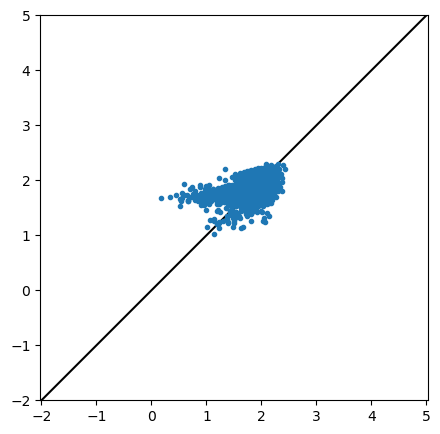

In [16]:
#震例结果
plt.figure(figsize=(5, 5))
plt.axis('equal')

x3 = np.arange(-2, 5, 0.01)
y3=x3
plt.plot(x3, y3, "black")

plt.plot(y_zhenli1_CH,zhenli_prediction_CH,'.')
plt.xlim(-2, 5)
plt.ylim(-2, 5)
plt.show()